This file contains code to quantify differences in song structure and sequence based on sequence linearity, consistency and stereotypy [Sakata and Brainard 2006] and transition entropy [Scharff and Nottebohm 1991].

Date: 13/10/22

In [89]:
import math
import pandas
import os
from tqdm import tqdm
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

In [90]:
#set directory
os.chdir('D:\\4th Year\\Semester 7\\BI4313 Sem Project\\IN-comparative-analysis\\IN-comparative-analysis\\Trans_prob')

In [91]:
file = pandas.read_csv('BF_b36p24_transition_probability.csv', header=None)
df = file.to_numpy()

#Drop the row and column labels, just keep the numeric values
trans_prob = file.iloc[1:, 1:]
trans_prob = np.array(trans_prob)
trans_prob = trans_prob.astype(float)

#Get the set of unique syllables for the individual with their own index (so convert array to list)
uniq_syl = file.iloc[0].to_numpy()
uniq_syl = np.delete(uniq_syl, 0)

Sequence Linearity

Number of unique syllables/Number of unique transitions

In [92]:
#SEQUENCE LINEARITY
#Number of unique syllables
n_syl = len(uniq_syl)

#To get the number of unique transitions, create an array with 1 whenever trans_prob > 0
#and get the sum of the array
trans_num = np.zeros_like(trans_prob)
trans_num[trans_prob > 0] = 1
n_trans = sum(map(sum, trans_num))

s_lin = n_syl/n_trans

print(f'Number of syllables: {n_syl}')
print(f'Number of transitions: {n_trans}')
print(f'Sequence linearity: {s_lin}')


Number of syllables: 8
Number of transitions: 30.0
Sequence linearity: 0.26666666666666666


Sequence Consistency

Sum of typical transitions/Sum of all transitions

In [93]:
#SEQUENCE CONSISTENCY
#"The typical transition type for each note is operationally defined as the one most frequently encountered 
#(for introductory notes, the two most frequently encountered)."

#numerator - sum of typical transitions
typ_trans = np.max(trans_prob, axis = 1)
typ_sum = sum(typ_trans)

#denominator - sum of all transitions
trans_sum = sum(map(sum, trans_prob))

s_con = typ_sum/trans_sum

print(f'Sum of typical transitions: {typ_sum}')
print(f'Sum of all transitions: {trans_sum}')
print(f'Sequence consistency: {s_con}')

Sum of typical transitions: 4.680000000000001
Sum of all transitions: 6.970000000000001
Sequence consistency: 0.6714490674318508


Sequence Stereotypy

In [94]:
#SEQUENCE STEREOTYPY

s_stereo = (s_lin + s_con)/2

print(f'Sequence stereotypy: {s_stereo}')

Sequence stereotypy: 0.4690578670492588


Transition entropy

sum (-p * log2[p])

In [95]:
#TRANSITION ENTROPY
from math import nan

trans_entropy = trans_prob

for i in range(len(trans_entropy)):
    for j in range(len(trans_entropy)):
        trans_entropy[i, j] = -trans_entropy[i, j] * np.log2(trans_entropy[i, j])

trans_entropy[np.isnan(trans_entropy)] = 0
transition_entropy = sum(map(sum, trans_entropy))

transition_entropy

C:\Users\VASUDH~1\AppData\Local\Temp/ipykernel_3060/3832714603.py:8: RuntimeWarning: divide by zero encountered in log2
  trans_entropy[i, j] = -trans_entropy[i, j] * np.log2(trans_entropy[i, j])
C:\Users\VASUDH~1\AppData\Local\Temp/ipykernel_3060/3832714603.py:8: RuntimeWarning: invalid value encountered in double_scalars
  trans_entropy[i, j] = -trans_entropy[i, j] * np.log2(trans_entropy[i, j])


7.866267142040055

In [8]:
#Test matrix
#trans_prob = np.array([[1, 0, 0], [0, 0.5, 0], [0, 0, 0.25]])

C:\Users\VASUDH~1\AppData\Local\Temp/ipykernel_3060/496419075.py:4: RuntimeWarning: divide by zero encountered in log2
  z = -x[i] * np.log2(x[i])
C:\Users\VASUDH~1\AppData\Local\Temp/ipykernel_3060/496419075.py:4: RuntimeWarning: invalid value encountered in double_scalars
  z = -x[i] * np.log2(x[i])


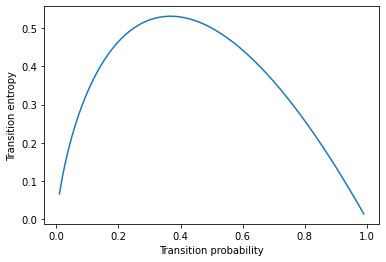

In [3]:

x = np.arange(0, 1, 0.01)
y = []
for i in range(0, len(x)):
    z = -x[i] * np.log2(x[i])
    y.append(z)

plt.xlabel('Transition probability')
plt.ylabel('Transition entropy')
plt.plot(x, y)
plt.savefig('Transition entropy.png')

To calculate differences in syllable types, and initial syllables, intersyllable interval, amplitude and so on. For that, we need to to go back to Onset-Offset data and chunk the song bouts using 'Start' and 'End'

Number of starting syllables - value and fraction

In [96]:
#To get the number of transitions from 'Start'

syl_list = uniq_syl.tolist()
s = syl_list.index('Start') #get the idex of 'Start' row

#sum over Number of transitions matrix 'Start' row using the index
n_start = np.sum(trans_num[s])

print(f'Number of unique start syllables: {n_start}')
print(f'Fraction of unique start syllables: {n_start/n_syl}')

Number of unique start syllables: 1.0
Fraction of unique start syllables: 0.125


In [97]:
#Set directory for Onset-Offset files
os.chdir('D:\\4th Year\\Semester 7\\BI4313 Sem Project\\IN-comparative-analysis\\IN-comparative-analysis\\OnsetOffsetFiles')

#Import text file as csv, choose header false and give column names manually, because they don't seem to align
#Use 'print(data.columns)' to get the list of column names
data = pandas.read_csv('BF_brown36pink24_undirected_141015.txt', sep = '\t', header=None, names = ['FileName', 'Syll #', 'Syll Label',
       ' Syll Onset (ms)', ' Syll Offset (ms)', ' Syll Duration (sec)', ' Mean Frequency (Hz)',
       ' Entropy', 'Log Amplitude (dB)', 'Pitch Goodness', 'FrequencyModulation',
       'AmplitudeModulation', 'EntropyVariance'])

#Drop the first row because column names are repeated there
data = data.iloc[1:, :]

#Convert onset, offset and syllable duration to float type
data[' Syll Onset (ms)'] = data[' Syll Onset (ms)'].astype(float)
data[' Syll Offset (ms)'] = data[' Syll Offset (ms)'].astype(float)
data[' Syll Duration (sec)'] = data[' Syll Duration (sec)'].astype(float)
#data[' Syll Offset (ms)']

#Add a 'start' label in the beginning of the dataframe
start_row = [0, 0, 'Start', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
data = pandas.DataFrame(np.insert(data.values, 0, start_row, axis=0))

#Give column labels again
data.columns = ['FileName', 'Syll #', 'Syll Label',
       ' Syll Onset (ms)', ' Syll Offset (ms)', ' Syll Duration (sec)', ' Mean Frequency (Hz)',
       ' Entropy', 'Log Amplitude (dB)', 'Pitch Goodness', 'FrequencyModulation',
       'AmplitudeModulation', 'EntropyVariance']

#To add a 'start' and 'end' in syllable label column after end of every bout

t_offset = data[' Syll Offset (ms)']
new_row = [[0, 0, 'End', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 'Start', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

#Create a list of indices where the labels should be inserted
#If the condition was just 'diff > 2000', the songs that start in the next file are not picked up
#So, add the condition that there's a break when it moves from one file to another
#Problem: This wouldn't work for songs that are split up across files

index_list = []
for i in range(1, len(data)-1):
    diff = t_offset[i+1] - t_offset[i]
    if diff > 2000 or diff < -8000:
        index_list.append(i)
#print(index_list)

#So now we have a list of indices where 'start' row should be inserted
#Adjust the index to correct for where the row will be inserted
#'2i' because we're adding new rows, and '+1' because of the initial 'start' row
for i in range(len(index_list)):
    index_list[i] += (2*i + 1)

#Insert the new_row at these indices
#PS. If this doesn't make sense, remove the correction, do a simple for loop and see what happens
for i in index_list:
    data = pandas.DataFrame(np.insert(data.values, i, new_row, axis=0))

#To add an 'End' label at the end
end_row = [[0, 0, 'End', 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]
data = pandas.DataFrame(np.insert(data.values, len(data), end_row, axis=0))

#Give column labels again
data.columns = ['FileName', 'Syll #', 'Syll Label',
       ' Syll Onset (ms)', ' Syll Offset (ms)', ' Syll Duration (sec)', ' Mean Frequency (Hz)',
       ' Entropy', 'Log Amplitude (dB)', 'Pitch Goodness', 'FrequencyModulation',
       'AmplitudeModulation', 'EntropyVariance']

#To confirm
#print(data)
#data.to_csv('BF_b36p24_trans_prob_start_end.csv', header = False, index = False)

In [98]:
#Get the indices at which 'End' exists to extract song bouts
syl = data['Syll Label']
all_syl = syl.tolist()

def find_indices(list, element):
    indices = [0]
    for idx, value in enumerate(list):
        if value == element:
            indices.append(idx)
    return indices

end_indices = find_indices(all_syl, 'End')
print(end_indices)

song_bouts = []
for i in range(len(end_indices)-1):
    x = data.iloc[end_indices[i] + 2 : end_indices[i+1] - 1, :9]
    song_bouts.append(x)

[0, 139, 154, 289, 428, 561, 647, 789, 930, 1057, 1198, 1364, 1461, 1593, 1596, 1681, 1773, 1796, 1853, 1944, 2020, 2023, 2026, 2085, 2123, 2199, 2380, 2489, 2573, 2641, 2685, 2834]


In [99]:
#To check how song data is being stored in the list, you can print it out in a text file or check the length 
#of the list

#Except for the first song bout, every other song bout starts with a 'Start' row 
#To avoid this, first syllable of first song can be lost, which seems fairer
with open(r'D:\\4th Year\\Semester 7\\BI4313 Sem Project\\IN-comparative-analysis\\IN-comparative-analysis\\OnsetOffsetFiles\\test_songbouts.txt', 'w') as fp:
    for item in song_bouts:
        fp.write("%s\n" % item)

print(f'Number of song bouts is roughly about: {len(song_bouts)}')
#Here, each element in the list is a Pandas dataframe

Number of song bouts is roughly about: 31


In [100]:
bout = song_bouts[0]
x = bout['Syll Label'].tolist()
#print(x)

for i in range(1, len(x)):
    if x[i] != x[0]:
        first_syllable_repeats = i
        break

print(f'First syllable repeats: {first_syllable_repeats}')


First syllable repeats: 5


1. Do the first syllables repeat in each song bout? 
2. Average number of syllables in each song bout

In [112]:
#To calculate if the first syllable repeats, and if yes, how many times?
#Also get the number of syllables in each song

repeat_y_n = []
syll_num = []

for i in range(len(song_bouts)):
    bout = song_bouts[i]
    syllable_list = bout['Syll Label'].tolist()
    syll_num.append(len(syllable_list))
    if len(syllable_list) > 3:
        if syllable_list[0] == syllable_list[1]:
            repeat_y_n.append(1)
        else:
            repeat_y_n.append(0)

print(sum(repeat_y_n), repeat_y_n, syll_num)
print(f'Average number of syllables in a song bout: {np.mean(syll_num)}')
print(f'Fraction of times the first syllable is repeated: {sum(repeat_y_n)/len(repeat_y_n)}')


24 [136, 12, 132, 136, 130, 83, 139, 138, 124, 138, 163, 94, 129, 0, 82, 89, 20, 54, 88, 73, 0, 0, 56, 35, 73, 178, 106, 81, 65, 41, 146]
Average number of syllables in a song bout: 88.41935483870968
Fraction of times the first syllable is repeated: 0.8571428571428571


3. Number of times the first syllable in a song bout repeats

In [113]:
#To count the number of repeated syllables in the beginning
repeat_num = []

for i in range(len(song_bouts)):
    bout = song_bouts[i]
    syllable_list = bout['Syll Label'].tolist()
    for t in range(1, len(syllable_list)):
        if syllable_list[t] != syllable_list[0]:
            first_syllable_repeats = t
            break
    repeat_num.append(first_syllable_repeats)

print(repeat_num)
print(f'Average number of repeats of first syllable is: {np.mean(repeat_num)}')
print(len(repeat_num))

[5, 3, 2, 3, 4, 3, 4, 5, 3, 1, 2, 2, 3, 3, 8, 2, 2, 3, 6, 3, 3, 3, 1, 2, 2, 1, 1, 2, 2, 2, 3]
Average number of repeats of first syllable is: 2.870967741935484
31


Instead of counting the number of repeats in each song bout, we can also get the weighted average of self-transition probability of the starting syllables

In [76]:
#To find the average self-transition probability of the first syllables after start
syl_list = uniq_syl.tolist()
s = syl_list.index('Start')

def find_indices(list, element):
    indices = []
    for idx, value in enumerate(list):
        if value == element:
            indices.append(idx)
    return indices

first_syl = trans_num[s].tolist()
first_syl_idx = find_indices(first_syl, 1)

first_syl_trans = []
for i in range(len(first_syl_idx)):
    t = first_syl_idx[i]
    first_syl_trans.append(trans_prob[t,t]*trans_prob[s,t])

print(first_syl_trans)
print(np.mean(first_syl_trans))

[0.16]
0.16
